In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

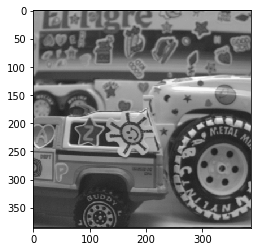

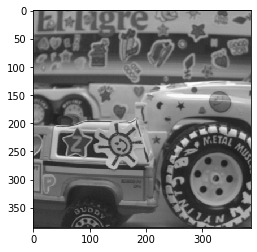

(386, 386)


In [3]:
trucka = cv2.imread("./trucka.bmp", 0) #1: color, 0: gray, -1:unchanged
truckb = cv2.imread("./truckb.bmp", 0)
plt.imshow(trucka, cmap="gray")
plt.show()
plt.imshow(truckb, cmap="gray")
plt.show()
print(trucka.shape)

In [17]:
"""
    Images: trucka.bmp, truckb.bmp
    Detect motions vectors between trucka.bmp and truckb.bmp.
    Use trucka.bmp as the basis, sample it by an 8×8, 11×11, 15×15, 21×21, 31×31 block.
    Threshold of search range: 50 pixels. (This is a reference value only!)
    Dimension of truck is 386×386 with 216 bytes of leading header.
"""
BlockSize = [9, 11, 15, 21, 31]
locationsX = []
locationsY = []
ArrowDirU = []
ArrowDirV = []

for index, bSize in enumerate(BlockSize):
    #0 1 2 3 4
    bLen = 386 // bSize
    print(bLen)
    locX = []
    locY = []
    ArrU = []
    ArrV = []
    for i in range(bLen):
        print("current at: " + str(index) +" row: " + str(i))
        for j in range(bLen): # for all trucka sliding windows(block) -> compare to all truckb block
            minValue = 1e+9
            curMinValue = 1e+9
            tempA, tempB = 0, 0
            leftIndex = i*bSize
            rightIndex = j*bSize
            for a in range(-50, 50):
                if i*bSize + a < 0 or i*bSize + a + bSize >= 386:
                    continue
                for b in range(-50, 50):
                    if j*bSize + b < 0 or j*bSize + b + bSize >= 386:
                        continue
                    #https://stackoverflow.com/questions/26445153/iterations-through-pixels-in-an-image-are-terribly-slow-with-python-opencv
                    #print(leftIndex, leftIndex+bSize, rightIndex, rightIndex+bSize, leftIndex + a, leftIndex + a + bSize, rightIndex + b, rightIndex + b + bSize)
                    curMinValue = np.sum(np.abs(trucka[leftIndex:leftIndex+bSize, rightIndex:rightIndex+bSize] - truckb[leftIndex + a:leftIndex + a + bSize, rightIndex + b:rightIndex + b + bSize]))
                    if curMinValue < minValue:
                        minValue = curMinValue
                        tempA = a
                        tempB = b
            locX.append(leftIndex)
            locY.append(rightIndex)
            ArrU.append(tempA)
            ArrV.append(tempB)
    locationsX.append(locX)
    locationsY.append(locY)
    ArrowDirU.append(ArrU)
    ArrowDirV.append(ArrV)

                    


42
current at: 0 row: 0
current at: 0 row: 1
current at: 0 row: 2
current at: 0 row: 3
current at: 0 row: 4
current at: 0 row: 5
current at: 0 row: 6
current at: 0 row: 7
current at: 0 row: 8
current at: 0 row: 9
current at: 0 row: 10
current at: 0 row: 11
current at: 0 row: 12
current at: 0 row: 13
current at: 0 row: 14
current at: 0 row: 15
current at: 0 row: 16
current at: 0 row: 17
current at: 0 row: 18
current at: 0 row: 19
current at: 0 row: 20
current at: 0 row: 21
current at: 0 row: 22
current at: 0 row: 23
current at: 0 row: 24
current at: 0 row: 25
current at: 0 row: 26
current at: 0 row: 27
current at: 0 row: 28
current at: 0 row: 29
current at: 0 row: 30
current at: 0 row: 31
current at: 0 row: 32
current at: 0 row: 33
current at: 0 row: 34
current at: 0 row: 35
current at: 0 row: 36
current at: 0 row: 37
current at: 0 row: 38
current at: 0 row: 39
current at: 0 row: 40
current at: 0 row: 41
35
current at: 1 row: 0
current at: 1 row: 1
current at: 1 row: 2
current at: 1 row

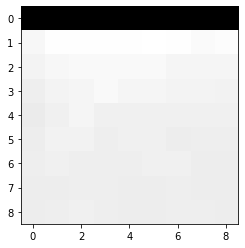

0 0 14735
0 1 13365
0 2 12133
0 3 11047
0 4 9014
0 5 7262
0 6 6041
0 7 5084
0 8 3592
0 13 3555
4 19 3465
4 20 3358
5 18 3342
5 19 3161
5 20 3121
16 34 2773
17 34 2529
18 34 2525
35 0 2460


In [18]:
bSize = 9    
leftIndex = 0*bSize
rightIndex = 0*bSize

plt.imshow(trucka[leftIndex:leftIndex+bSize, rightIndex:rightIndex+bSize], cmap="gray")
plt.show()

minValue = 1e+9
curMinValue = 1e+9
tempA, tempB = 0, 0
for a in range(-50, 50):
    if leftIndex + a < 0 or leftIndex + a + bSize >= 386:
        continue
    for b in range(-50, 50):
        if rightIndex + b < 0 or rightIndex + b + bSize >= 386:
            continue
        curMinValue = np.sum(np.abs(trucka[leftIndex:leftIndex+bSize, rightIndex:rightIndex+bSize] - truckb[leftIndex + a:leftIndex + a + bSize, rightIndex + b:rightIndex + b + bSize]))
        if curMinValue < minValue:
            print(a, b, curMinValue)
            minValue = curMinValue
            tempA = a
            tempB = b
            
            

35 0


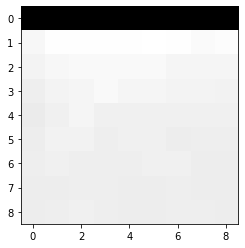

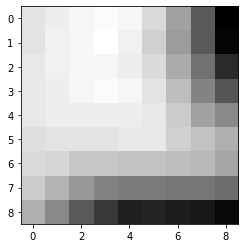

In [22]:
X = np.array(locationsX[0])
Y = np.array(locationsY[0])
U = np.array(ArrowDirU[0])
V = np.array(ArrowDirV[0])
bSize = 9
leftIndex = X[0]
rightIndex = Y[0]
a = U[0]
b = V[0]
print(a, b)
plt.imshow(trucka[leftIndex:leftIndex+bSize, rightIndex:rightIndex+bSize], cmap="gray")
plt.show()
plt.imshow(truckb[leftIndex + a:leftIndex+bSize+a, rightIndex + b:rightIndex+bSize+b], cmap="gray")
plt.show()



In [45]:
print(ArrowDirU[0, :10])
print(ArrowDirV[0, :10])

TypeError: list indices must be integers or slices, not tuple

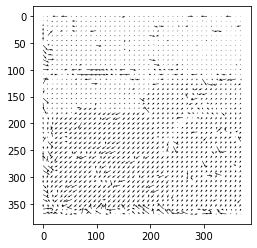

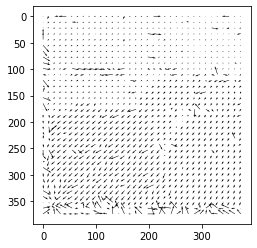

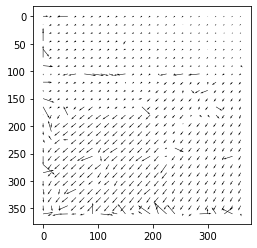

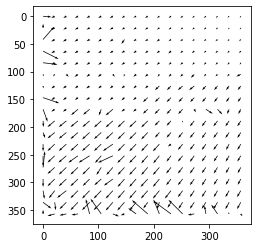

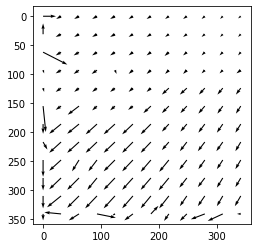

In [81]:
#How to plot vectors in python using matplotlib
#https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib/42283226
#https://matplotlib.org/3.2.0/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py

for i in range(5):
    X = np.array(locationsX[i])
    Y = np.array(locationsY[i])
    U = np.array(ArrowDirU[i])
    V = np.array(ArrowDirV[i])
    #Where X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.
    fig, ax = plt.subplots()
    #plt.gca().invert_yaxis()
    #ax.invert_yaxis()
    q = ax.quiver(Y, X, V, U,angles='xy')
    ax.quiverkey(q, X=0.4, Y=1.1, U=10,
                 label='Size ' + str(BlockSize[i]), labelpos='E')
    ax.invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(fname=str(i+1) + '.png', dpi=200)
    plt.show()

In [ ]:
for index, bSize in enumerate(BlockSize):
    #0 1 2 3 4
    bLen = 386 // bSize
    for i in range(bLen):
        print("current at: " + str(index) +" row: " + str(i))
        for j in range(bLen): # for all trucka sliding windows(block) -> compare to all truckb block
            minValue = 1e+9
            curMinValue = 1e+9
            tempA, tempB = 0, 0
            leftIndex = i*bSize
            rightIndex = j*bSize
            for a in range(-50, 50):
                if i*bSize + a < 0 or i*bSize + a + bSize >= 386:
                    continue
                for b in range(-50, 50):
                    if j*bSize + b < 0 or j*bSize + b + bSize >= 386:
                        continue
                    curMinValue = np.sum(np.abs(trucka[leftIndex:leftIndex+bSize, rightIndex:rightIndex+bSize] - truckb[leftIndex + a:leftIndex + a + bSize, rightIndex + b:rightIndex + b + bSize]))
                    if curMinValue < minValue:
                        minValue = curMinValue
                        tempA = a
                        tempB = b

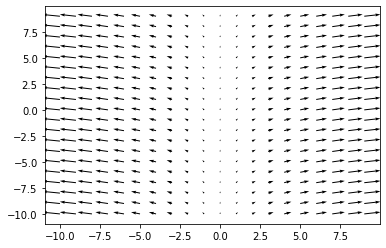

In [43]:
X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)
V = np.ones((20, 20))
#X = np.ones((20))
#print(U)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=10.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

In [49]:
"""
    Images: trucka.bmp, truckb.bmp
    Detect motions vectors between trucka.bmp and truckb.bmp.
    Use trucka.bmp as the basis, sample it by an 8×8, 11×11, 15×15, 21×21, 31×31 block.
    Threshold of search range: 50 pixels. (This is a reference value only!)
    Dimension of truck is 386×386 with 216 bytes of leading header.
"""
BlockSize = [9, 11, 15, 21, 31]
locationsX = []
locationsY = []
ArrowDirU = []
ArrowDirV = []

for index, bSize in enumerate(BlockSize):
    #0 1 2 3 4
    bLen = 386 // bSize
    print(bLen)
    locX = []
    locY = []
    ArrU = []
    ArrV = []
    for i in range(bLen):
        print("current at: " + str(index) +" row: " + str(i))
        for j in range(bLen): # for all trucka sliding windows(block) -> compare to all truckb block
            minValue = 1e+9
            curMinValue = 1e+9
            tempA, tempB = 0, 0
            leftIndex = i*bSize
            rightIndex = j*bSize
            for a in range(-50, 50):
                if i*bSize + a < 0 or i*bSize + a + bSize >= 386:
                    continue
                for b in range(-50, 50):
                    if j*bSize + b < 0 or j*bSize + b + bSize >= 386:
                        continue
                    #https://stackoverflow.com/questions/26445153/iterations-through-pixels-in-an-image-are-terribly-slow-with-python-opencv
                    #print(leftIndex, leftIndex+bSize, rightIndex, rightIndex+bSize, leftIndex + a, leftIndex + a + bSize, rightIndex + b, rightIndex + b + bSize)
                    curMinValue = np.mean(np.square(trucka[leftIndex:leftIndex+bSize, rightIndex:rightIndex+bSize] - truckb[leftIndex + a:leftIndex + a + bSize, rightIndex + b:rightIndex + b + bSize]))
                    if curMinValue < minValue:
                        minValue = curMinValue
                        tempA = a
                        tempB = b
            locX.append(leftIndex)
            locY.append(rightIndex)
            ArrU.append(tempA)
            ArrV.append(tempB)
    locationsX.append(locX)
    locationsY.append(locY)
    ArrowDirU.append(ArrU)
    ArrowDirV.append(ArrV)

42
current at: 0 row: 0
current at: 0 row: 1
current at: 0 row: 2
current at: 0 row: 3
current at: 0 row: 4
current at: 0 row: 5
current at: 0 row: 6
current at: 0 row: 7
current at: 0 row: 8
current at: 0 row: 9
current at: 0 row: 10
current at: 0 row: 11
current at: 0 row: 12
current at: 0 row: 13
current at: 0 row: 14
current at: 0 row: 15
current at: 0 row: 16
current at: 0 row: 17
current at: 0 row: 18
current at: 0 row: 19
current at: 0 row: 20
current at: 0 row: 21
current at: 0 row: 22
current at: 0 row: 23
current at: 0 row: 24
current at: 0 row: 25
current at: 0 row: 26
current at: 0 row: 27
current at: 0 row: 28
current at: 0 row: 29
current at: 0 row: 30
current at: 0 row: 31
current at: 0 row: 32
current at: 0 row: 33
current at: 0 row: 34
current at: 0 row: 35
current at: 0 row: 36
current at: 0 row: 37
current at: 0 row: 38
current at: 0 row: 39
current at: 0 row: 40
current at: 0 row: 41
35
current at: 1 row: 0
current at: 1 row: 1
current at: 1 row: 2
current at: 1 row

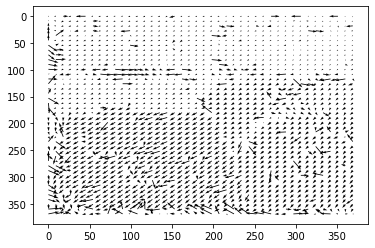

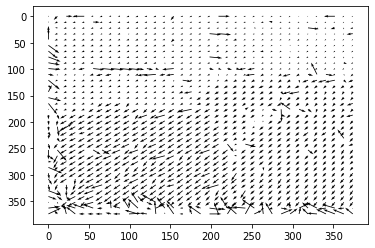

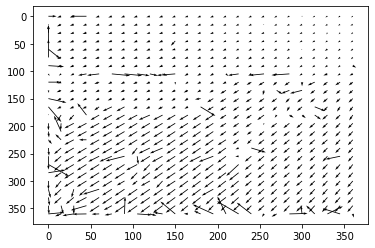

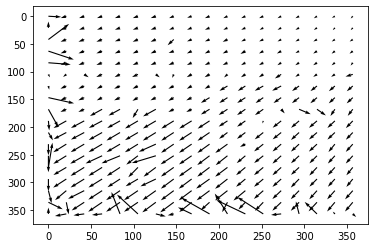

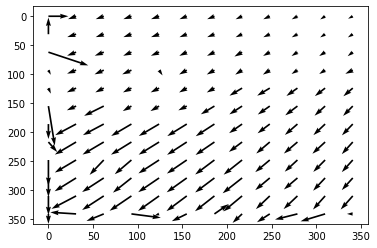

In [73]:

for i in range(5):
    X = np.array(locationsX[i])
    Y = np.array(locationsY[i])
    U = np.array(ArrowDirU[i])
    V = np.array(ArrowDirV[i])
    
    #Where X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.

    fig, ax = plt.subplots()
    q = ax.quiver(Y, X, V, U,angles='xy')
    ax.quiverkey(q, X=0.4, Y=1.1, U=10,
                 label='Size ' + str(BlockSize[i]), labelpos='E')
    plt.gca().invert_yaxis()
    plt.savefig(fname='MSE' + str(i+1) + '.png', dpi=200)
    plt.show()